# IRAS 16562-3959 Surface Density Distribution

In [1]:
# Parts of the code were adapted from Jake VanderPlas entry on AstroML
# http://www.astroml.org/book_figures/chapter6/fig_great_wall.html

# Importing libraries
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.colors import LogNorm
import matplotlib.patches as patches
import matplotlib as mpl

from scipy.spatial import cKDTree

from astroML.density_estimation import KDE, KNeighborsDensity

#----------------------------------------------------------------------
# This function adjusts matplotlib settings for a uniform feel in the textbook.
# Note that with usetex=True, fonts are rendered with LaTeX.  This may
# result in an error if LaTeX is not installed on your system.  In that case,
# you can set usetex to False.
from astroML.plotting import setup_text_plots
setup_text_plots(fontsize=8, usetex=True)


In [2]:
# Open the data
X = np.loadtxt('All_protostars_with_unclass_Xray_physical_coordinates.txt')
Class_I = np.loadtxt('Class_I_physical_coordinates.txt')
Class_II = np.loadtxt('Class_II_physical_coordinates.txt')
Class_III = np.loadtxt('Class_III_physical_coordinates.txt')
Unclass = np.loadtxt('Unclassified_Xray_physical_coordinates.txt')

# Create  the grid on which to evaluate the results
Nx = 200
Ny = 200
xmin, xmax = (-8, 8)
ymin, ymax = (-8, 8)


# Evaluate for several models
Xgrid = np.vstack(map(np.ravel, np.meshgrid(np.linspace(xmin, xmax, Nx),
                                            np.linspace(ymin, ymax, Ny)))).T

knn6 = KNeighborsDensity('bayesian', 6)
dens_k6 = knn6.fit(X).eval(Xgrid).reshape((Ny, Nx))

knn10 = KNeighborsDensity('bayesian', 10)
dens_k10 = knn10.fit(X).eval(Xgrid).reshape((Ny, Nx))

knn18 = KNeighborsDensity('bayesian', 18)
dens_k18 = knn18.fit(X).eval(Xgrid).reshape((Ny, Nx))

knn22 = KNeighborsDensity('bayesian', 22)
dens_k22 = knn22.fit(X).eval(Xgrid).reshape((Ny, Nx))


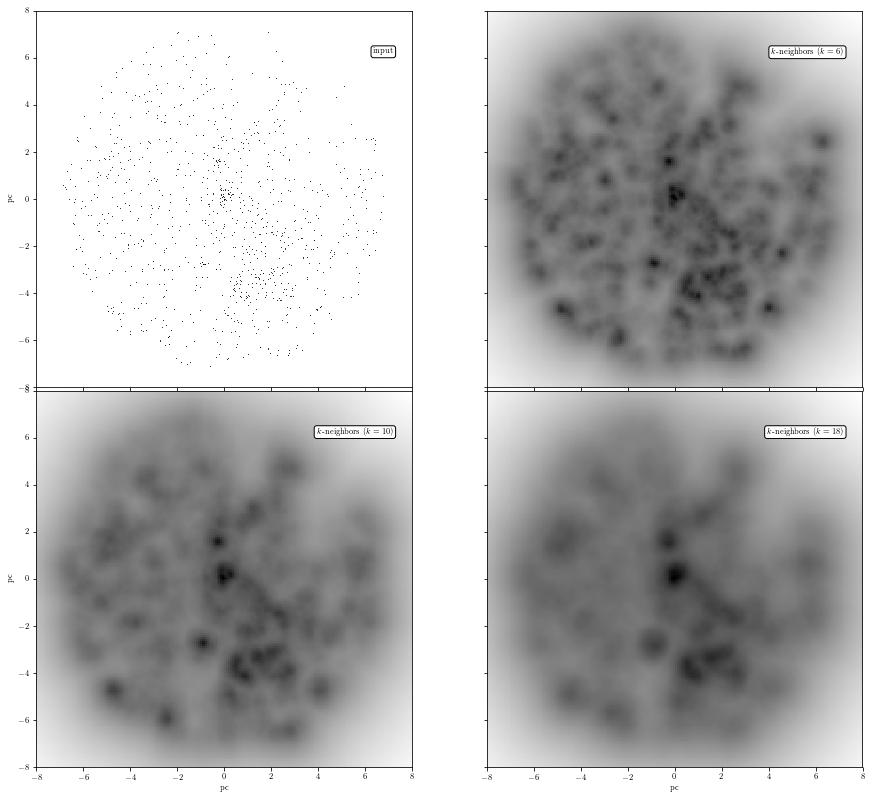

In [3]:
# Plot the results
fig = plt.figure(figsize=(15, 15))
fig.subplots_adjust(left=0.12, right=0.95, bottom=0.2, top=0.9,
                    hspace=0.01, wspace=0.01)

# First plot: scatter the points
ax1 = plt.subplot(221, aspect='equal')
ax1.scatter(X[:, 1], X[:, 0], s=1, lw=0, c='k')
ax1.text(0.95, 0.9, "input", ha='right', va='top',
         transform=ax1.transAxes,
         bbox=dict(boxstyle='round', ec='k', fc='w'))

# Second plot: KNN, k=6
ax2 = plt.subplot(222, aspect='equal')
ax2.imshow(dens_k6.T, origin='lower', norm=LogNorm(),
           extent=(ymin, ymax, xmin, xmax), cmap=plt.cm.binary)
ax2.text(0.95, 0.9, "$k$-neighbors $(k=6)$", ha='right', va='top',
         transform=ax2.transAxes,
         bbox=dict(boxstyle='round', ec='k', fc='w'))

# Third plot: KNN, k=10
ax3 = plt.subplot(223, aspect='equal')
ax3.imshow(dens_k10.T, origin='lower', norm=LogNorm(),
           extent=(ymin, ymax, xmin, xmax), cmap=plt.cm.binary)
ax3.text(0.95, 0.9, "$k$-neighbors $(k=10)$", ha='right', va='top',
         transform=ax3.transAxes,
         bbox=dict(boxstyle='round', ec='k', fc='w'))

# Fourth plot: KNN, k=18
ax4 = plt.subplot(224, aspect='equal')
ax4.imshow(dens_k18.T, origin='lower', norm=LogNorm(),
           extent=(ymin, ymax, xmin, xmax), cmap=plt.cm.binary)
ax4.text(0.95, 0.9, "$k$-neighbors $(k=18)$", ha='right', va='top',
         transform=ax4.transAxes,
         bbox=dict(boxstyle='round', ec='k', fc='w'))

for ax in [ax1, ax2, ax3, ax4]:
    ax.set_xlim(ymin, ymax - 0.01)
    ax.set_ylim(xmin, xmax)

for ax in [ax1, ax2]:
    ax.xaxis.set_major_formatter(plt.NullFormatter())

for ax in [ax3, ax4]:
    ax.set_xlabel('pc')

for ax in [ax2, ax4]:
    ax.yaxis.set_major_formatter(plt.NullFormatter())

for ax in [ax1, ax3]:
    ax.set_ylabel('pc')


plt.show()

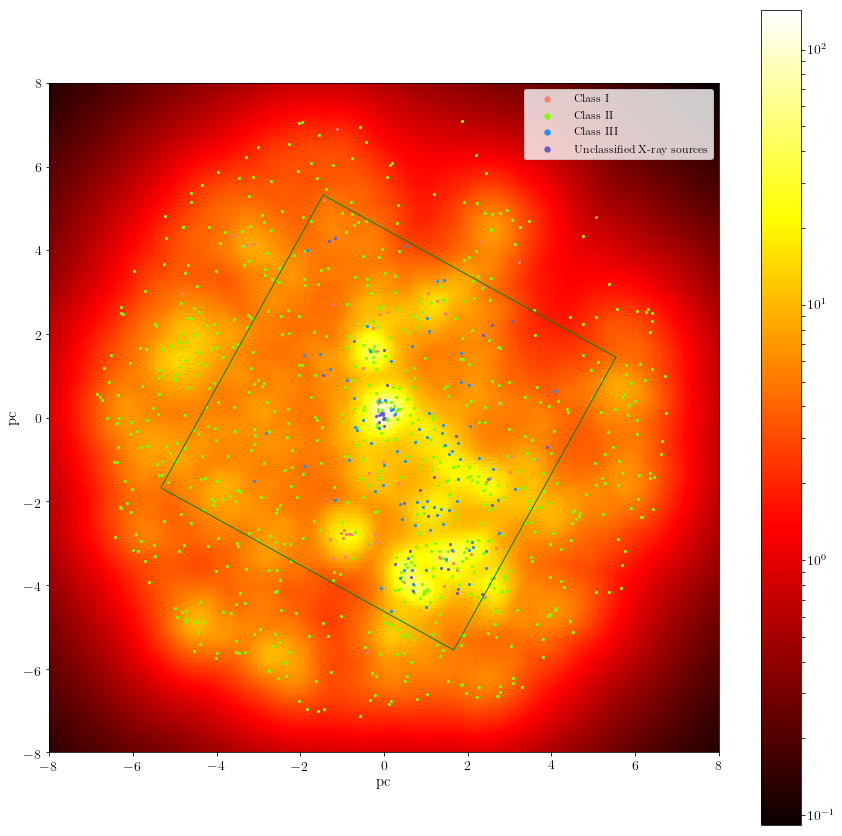

In [4]:
plt.figure(4, figsize=(15,15))
ax5 = plt.subplot(111)
ax5.scatter(Class_I[:, 1], Class_I[:, 0], s=10, lw=0, c='salmon', label='Class I')
ax5.scatter(Class_II[:, 1], Class_II[:, 0], s=10, lw=0, c='lawngreen', label='Class II')
ax5.scatter(Class_III[:, 1], Class_III[:, 0], s=10, lw=0, c='dodgerblue', label='Class III')
ax5.scatter(Unclass[:, 1], Unclass[:, 0], s=10, lw=0, c='slateblue', label='Unclassified X-ray sources')
hx = ax5.imshow(dens_k18.T, origin='lower', norm=LogNorm(),
           extent=(ymin, ymax, xmin, xmax), cmap=plt.cm.hot)
cb = plt.colorbar(hx)
cb.ax.tick_params(labelsize=14)
rect = patches.Rectangle((-3.85,-4.05),8,8, fill=False, edgecolor='g')
t = mpl.transforms.Affine2D().rotate_deg(331) + ax5.transData
rect.set_transform(t)
plt.gca().add_patch(rect)
plt.legend(scatterpoints=1, markerscale=2., fontsize=12, loc=1)
plt.xlabel('pc', fontsize = 15)
plt.ylabel('pc', fontsize = 15)
plt.tick_params(labelsize=14)


plt.show()